In [2]:
# Creating random datasets
import numpy as np
num_vector = 2000
vector_values = []

for i in xrange(num_vector):
    if np.random.random() > .5:
        vector_values.append([np.random.normal(.0,.9), np.random.normal(.0,.9)])
    else:
        vector_values.append([np.random.normal(3.0,.5), np.random.normal(1.,.5)])


<function matplotlib.pyplot.show>

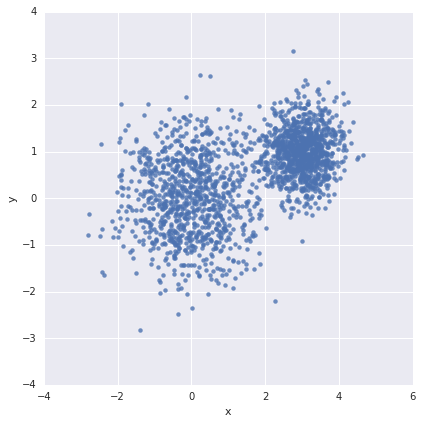

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.DataFrame({"x": [v[0] for v in vector_values],
                  "y": [v[1] for v in vector_values]})
#print df

sns.lmplot("x","y", data=df, fit_reg=False, size=6)
plt.show

In [59]:
import numpy as np
import tensorflow as tf

vectors = tf.constant(vector_values) #Stored in 2D Vector
k=4 # 4 Clusters

#Randomly shuffle the input vectors and slice off the first k-cluster as a 2-D tensor
centroides = tf.Variable(tf.slice(tf.random_shuffle(vectors),[0,0],[k,-1]))

#Making them 3-D
expanded_vectors = tf.expand_dims(vectors, 0)
expanded_centroides = tf.expand_dims(centroides, 1)

#Because of shape broadcasting feature tensorflow figures out how to do subtraction
assignments = tf.argmin(tf.reduce_sum(tf.square(tf.sub(expanded_vectors, expanded_centroides)),2),0) #Squared Euclidian distances

#Averaging them out to calculate new centroids
means = tf.concat(0, [tf.reduce_mean(tf.gather(vectors, tf.reshape(tf.where( tf.equal(assignments, c)),[1,-1])), reduction_indices=[1]) for c in xrange(k)])

#Assigning centroides = means
update_centroides = tf.assign(centroides, means)

init_op = tf.initialize_all_variables()

sess = tf.Session()
sess.run(init_op)

#Updating the Centroides and Assignments
for step in xrange(100):
     _, centroid_values, assignment_values = sess.run([update_centroides, centroides, assignments])
#As update_centroides is an operation whose result is not the parameter that returns anything so “_”

print "Centroid Values: ", centroid_values, "\nAssignments: ", assignment_values

Centroid Values:  [[ 1.86348855  0.73792422]
 [-0.58899581  0.45483935]
 [ 0.24198663 -0.73616648]
 [ 3.16306257  1.03403306]] 
Assignments:  [0 1 2 ..., 1 3 1]


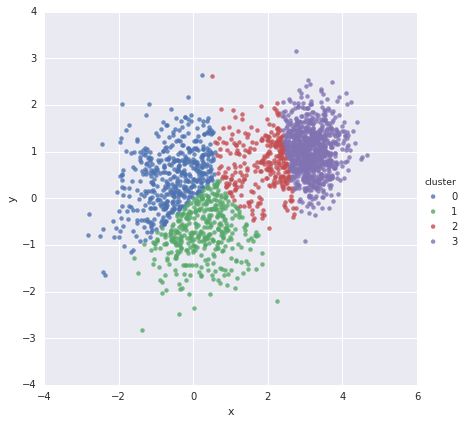

In [58]:
data = {"x": [], "y": [], "cluster": []}

for i in xrange(len(assignment_values)):
  data["x"].append(vector_values[i][0])
  data["y"].append(vector_values[i][1])
  data["cluster"].append(assignment_values[i])

df = pd.DataFrame(data)
sns.lmplot("x", "y", data=df, fit_reg=False, size=6, hue="cluster", legend=True)
plt.show()